## Quantum Jump Trajectories

Simulating the quantum-jump trajectories for the master equation of  describing a driven-dissipative qubit. This method involves simulating the dynamics of an *unnormalised* pure state $$ |\tilde{\psi}(t)\rangle = {\rm e}^{-{\rm i}\hat{H}_{\rm eff}t/\hbar}|\psi(0)\rangle,$$ where  the non-Hermitian Hamiltonian is $$ \hat{H}_{\rm eff} = \hat{H} -\frac{{\rm i \hbar\gamma }}{2} \hat{\sigma}_+\hat{\sigma}_-.$$ The waiting time distribution describing photon emissions, $W(t) = -{\rm d}P_0/{\rm d} t$, can then be sampled using the expression for the survival probability, $P_0(t) = \langle \tilde{\psi}(t)|\tilde{\psi}(t)\rangle.$


The driven-dissipative qubit described by the interaction-picture master equation:
 $$\frac{{\rm d}}{{\rm d}t} \hat{\rho} = \frac{1}{{\rm i}\hbar} [ \hat{H},\hat{\rho}] + \gamma \mathcal{D}[\hat{\sigma}_-]\hat{\rho},$$ where $$\hat{H} = \frac{\hbar\Delta}{2} \hat{\sigma}_z + \frac{\hbar\Omega}{2}\hat{\sigma}_x.$$ With parameters $\gamma = 0.2\Omega$ and $\Delta = 0.05\Omega$ in the following.

I numerically sample the waiting-time distribution by evolving the initial state under the non-Hermitian Hamiltonian, discretising time in small steps $\Delta t$ such that
$$ |\tilde{\psi}(t+\Delta t)\rangle = {\rm e}^{-{\rm i}\hat{H}_{\rm eff}\Delta t /\hbar}|\tilde{\psi}(t)\rangle.$$

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.linalg import expm
from numpy.random import random
plt.figure(figsize = [10,4])
s0 = np.array([[1,0]
              ,[0,1]])
sx = np.array([[0,1]
               ,[1,0]])
sy = np.array([[0,-1j]
              ,[1j,0]])
sz = np.array([[1,0]
               ,[0,-1]])
sigma_plus = np.array([[0,1]
                       ,[0,0]])
sigma_minus = np.array([[0,0]
                        ,[1,0]])
eye = np.eye(2,2)
zero = np.array([[1]
                 ,[0]])
one = np.array([[0]
                ,[1]])
basis = zero,one
e = ((np.sqrt(2))**(-1))*np.array([s0,sx,sy,sz])
def H(omega):
    return 0.5*0.05*omega*sz + 0.5*omega*sx

<Figure size 720x288 with 0 Axes>

In [6]:
omega = 0
gamma = 1
#defining my non-Hermitian Hamiltonian in terms of my previously defined H from q6
def H_eff(omega,gamma):
    return H(omega) - (0.5j)*gamma*sigma_plus@sigma_minus
#checking to see if it commutes with its conj().T
H_eff(0,1)@H_eff(0,1).conj().T == H_eff(0,1).conj().T@H_eff(0,1) #commutes

array([[ True,  True],
       [ True,  True]])

Using the cumulative distribution function is $p_c(x) = \int_0^x {\rm d}x' p(x')$. Sampling the distribution is then achieved by choosing $x$ such that $p_c(x)= r$, where $r$ is a random number uniformly distributed in the unit interval $r\in [0,1]$.
With $p_c(\tau) = 1 - P_{0}(\tau) = 1 - e^{-\gamma \tau}$, Hence using $\gamma\tau = ln(\frac{1}{1-r}) $

Text(0.5, 1.0, 'W($\\gamma$t) for 200 trajectories')

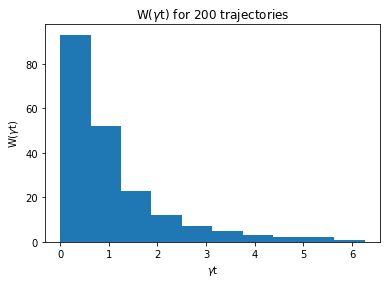

In [7]:
#gamma tau in terms of r to use for sampling 
def sample_W():
    r = random()
    
    return (-1)*np.log(1-r)
n_samp = int(200)
samples = [sample_W() for ii in range(n_samp)]
    
# Plot a histogram of the results
plt.hist(samples,10)
plt.xlabel('$\gamma$t')
plt.ylabel('W($\gamma$t)')
plt.title('W($\gamma$t) for 200 trajectories')

Text(0.5, 1.0, 'Analytical solution for W($\\gamma$t)')

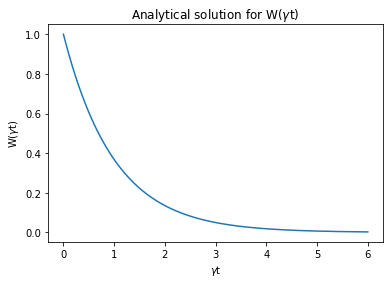

In [8]:
def Analytical_W(gamma,t):
    return gamma*np.exp(-gamma*t)

t = np.linspace(0,6,200)
plt.plot(t,Analytical_W(1,t))
plt.xlabel('$\gamma$t')
plt.ylabel('W($\gamma$t)')
plt.title('Analytical solution for W($\gamma$t)')

Thus we can see that both the sampled histogram plot and the analytical solution follow an exponential decay in terms of $\gamma$t 

I now extend this to the general case where $\Omega\neq 0$, so that multiple emissions can occur within a single trajectory. 

Parameters: $\Delta = 0.05\Omega$ and $\gamma = 0.2\Omega$

Initial condition $\rho(0) = |1\rangle\langle 1| = |\downarrow\rangle\langle \downarrow|$

Simulate up to a time $\Omega t=30$.

Change of state when an emission occurs:
$$|\tilde{\psi}\rangle\longrightarrow \frac{\hat{\sigma}_- |\tilde{\psi}\rangle}{\lvert\!\lvert \hat{\sigma}_- |\tilde{\psi}\rangle\rvert\!\rvert^2} = |\downarrow\rangle.$$



I compute the conditional expectation value of $\sigma_z$ along a single trajectory: $$\langle \hat{\sigma}_z\rangle = \frac{\langle \tilde{\psi}|\hat{\sigma}_z|\tilde{\psi}\rangle}{\langle \tilde{\psi}|\tilde{\psi}\rangle},$$
where the denominator accounts for the loss of normalisation. 

In [9]:
omega = 1
delta = 0.05*omega
gamma = 0.2*omega
H_eff = H(omega) - (0.5j)*gamma*sigma_plus@sigma_minus

def U(dt):
    return expm(-1j*H_eff*dt)

In [13]:

def time_evo7(U_dt, psi_0, t_tot, dt,obs):
    
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    psi,t = psi_0, 0 # Initial state and time
    t_axis =  np.zeros(n_steps+1)# Time axis
    #P = np.zeros((n_steps+1))  
    exp = np.zeros(len(t_axis))
    r = random()
    l = 0
    # Loop over timesteps
    for ii in range(n_steps+1):
        t_axis[ii] = t
        P = (psi.conj().T@psi) #computing the no detection probability
        e1 = (psi.conj().T@obs@psi)#computing unnormalised expectation value        
        exp[ii] = (e1/P).real
        
        #r = 1-P[ii]
        if np.round(P,2) == np.round(1-r,2):
            #my unnormalised new psi
            psi_o = sigma_minus@psi
            #compute my frobenius norm
            frob_norm = psi_o.conj().T@psi_o  
            
            #making sure my frobenius norm is not too small, if so I ditch this value as an error
            if frob_norm == 0:
                psi = psi
            else:
                psi = psi_o/frob_norm
            

            l += 1
            
        else:
            # Take a step forward in time
            psi = U_dt@psi
            
        t += dt
    
    
    return t_axis , exp ,l

Plotting these conditional expectation values as a function of time for three different random trajectories.

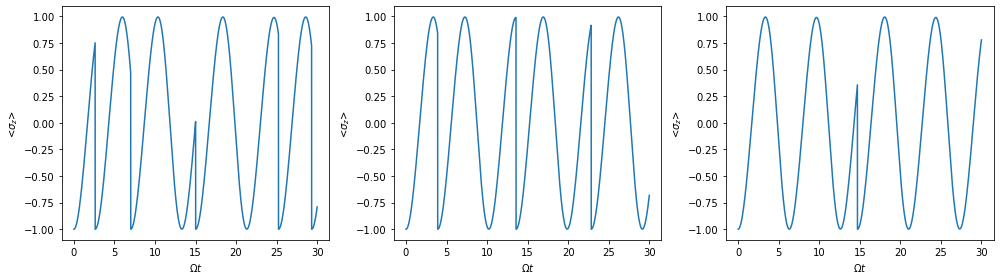

In [14]:
fig2, ax1 = plt.subplots(1,3,figsize=(14,4))

#plotting my three random trajectories out of a selection with more jumps than 0 but less than
# 7 so as to have more clear plots of what is happening
i = 0
for j in range(3):
    while i < 8:
        x1,z1,l = time_evo7(U(0.008), one, 30, 0.008,sz)
        if 0 < l <= 7:
            ax1[j].plot(x1,z1)
            ax1[j].set(xlabel = '$\Omega t$', ylabel = '<$\sigma_{z}$>')            
            break
        i += 1
plt.tight_layout(w_pad=1)

Simulating 100 trajectories up to a time $\Omega t=30$ and average over the results and plotting the average expectation $\langle \hat{\sigma}_z\rangle$ obtained from the trajectories as a function of time against numerical solution for $\langle \hat{\sigma}_z\rangle$

## Numerical solution by constructing Liouvillian with vectorised basis

Operator basis $\hat{e}_{ij} = |i\rangle \langle j|$ , vectorisation map $|i\rangle \langle j| \to |i\rangle\otimes |j\rangle$ to construct the Liouvillian.


This function that takes an arbitrary operator as input and outputs its vectorised form, $\hat{\rho} = \sum_{i,j}\rho_{ij} |i\rangle\langle j| \longrightarrow |\rho\rangle\!\rangle = \sum_{i,j}\rho_{ij} |i\rangle \otimes |j\rangle.$

In [40]:
def vectorised(rho,basis):
    '''takes an arbitrary operator as input and its basis and outputs its vectorised form'''
    rho_vec = 0
    for i in range(2):
        for j in range(2):
            rho_vec += (basis[i].T@rho@basis[j])*np.kron(basis[i],basis[j])   
    return rho_vec

def unvec(A):
    '''unvectorizes'''
    A1 = np.zeros((2,2),dtype = 'complex')
    A1[0,0] = A[0]
    A1[0,1] = A[1]
    A1[1,0] = A[2]
    A1[1,1] = A[3]
    return A1

This function generates the matrix representation of the left- and right-multiplication superoperators, $\hat{\mathcal{M}}_L[\hat{A}]$ and $\hat{\mathcal{M}}_R[\hat{A}]$, for an arbitrary operator $\hat{A}$. 
I use these functions to construct the Hamiltonian superoperator $\mathcal{H} = [\hat{H},\bullet]$ 

In [25]:
def ML(A):
    '''left-multiplication superoperator'''
    return np.kron(A,np.eye(len(A)))

def MR(A):
    '''right-multiplication superoperator'''
    return np.kron(np.eye(len(A)),A.T)

def hamiltonian_superoperator(H):
    return ML(H) - MR(H)


In [26]:
def D(A): 
    #I use my previously defined left and right multiplication operators in this basis 
    #to define my dissipator
    B = A.conj().T
    D = ML(A)@MR(B) - 0.5*(ML(B)@ML(A)+MR(A)@MR(B))
    return D

In [28]:
#define a function for my evolution operator
def evolution_op_vec(dt):
    return expm(Le_vec*dt)
def evolution_op(dt):
    return expm(L*dt)

In [29]:
# Define a function for iteratively carrying out unitary time evolution as in Worksheet 1
def time_evo2(U_dt, rho_0, t_tot, dt, obs):
    
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    n_obs = len(obs)         # Number of observables to compute at each timestep
    rho,t = rho_0, 0       # Initial state and time
    t_axis, obs_exp = np.zeros(n_steps+1), np.zeros([n_obs,n_steps+1]) # Time axis and observable expectation values
    rhoT = np.zeros((n_steps+1),dtype = 'complex') #want to store the trace of my rho  
    
    # Loop over timesteps
    for ii in range(n_steps):
        
        # Compute and store expectation values
        t_axis[ii] = t
        for jj in range(n_obs):
            this_obs = np.vdot(obs[jj].conj().T,rho)
            obs_exp[jj,ii] = np.real(this_obs)
        rhoT[ii] = np.trace(unvec(rho))
        # Take a step forward in time
        rho = U_dt@rho
        t += dt
        
        
    rhoT[n_steps] = np.trace(unvec(rho))
    # Compute and store final expectation values
    t_axis[ii+1] = t
    for jj in range(n_obs):
        this_obs = np.vdot(obs[jj].conj().T,rho)
        obs_exp[jj,ii+1] = np.real(this_obs)

    return t_axis, obs_exp, rhoT.real

In [30]:
omega = 1
gamma = 0.2*omega
delta = 0.05*omega

#using hbar=1
H6 = 0.5*delta*sz + 0.5*omega*sx
rho0 = np.outer(one,one.conj())
HS = hamiltonian_superoperator(H6)


In [31]:
def L6(H,gamma):
    sm = np.array([[0,0],[1,0]])
    L = (1j)*hamiltonian_superoperator(H)+gamma*D(sm)
    return L
L6 = L6(H6,gamma)
rho6 = vectorised(rho0,basis)

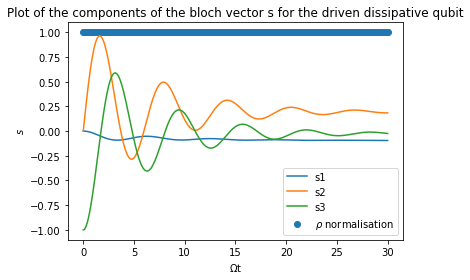

In [41]:
labels1 = ['s1','s2','s3']
def evolution6(dt):
    return expm(L6*dt)
#bloch vector s = {s1,s2,s3} = {<sx>,<sy>,<sz>}
t_axis6, obs_exp6, rho6 = time_evo2(evolution6(0.05), rho6, 30, 0.05, vectorised(e[1:],basis))
for i in range(3):
    #I have used np.sqrt(2) to amke up for my e having coefficient 1/sqrt(2) above
    plt.plot(t_axis6,np.sqrt(2)*obs_exp6[i], label = labels1[i])
plt.scatter(t_axis6,rho6,label = '$\\rho$ normalisation')
plt.xlabel('$\Omega$t')
plt.ylabel('$s$')
plt.title('Plot of the components of the bloch vector s for the driven dissipative qubit')
plt.legend()

### Plotting the sampled solution against the numerical

<Figure size 1008x432 with 0 Axes>

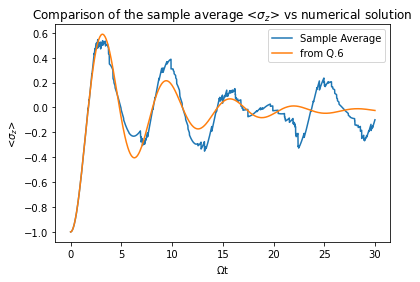

<Figure size 1008x432 with 0 Axes>

In [42]:
#z = np.zeros((100,3751))
Z = np.zeros(3751,)
for i in range(100):
    x,z,l = time_evo7(U(0.008), one, 30, 0.008,sz)
    Z += z


plt.plot(x,Z/100, label = 'Sample Average')  
plt.plot(t_axis6,np.sqrt(2)*obs_exp6[2], label = 'from Q.6')
plt.title('Comparison of the sample average <$\sigma_{z}$> vs numerical solution')
plt.xlabel('$\Omega$t')
plt.ylabel('<$\sigma_{z}$>')
plt.legend()
plt.figure(figsize = (14,6))